Elektrotehnički fakultet Beograd <br>
## <font color='blue'>Računarsko modelovanje fizičkih pojava </font>
# PROBNI ISPIT
## 28.04.2020. 

# Stefan Brankovic

***
<font color='red'>
Preimenovati svesku: File/Rename u __ispit_ime_prezime__<br>
Redovno snimati aktuelnu verziju sveske: File/Save and Checkpoint <br>
Snimati fajl: Download as Notebook (.ipynb) </font>
***

#### __Zadatak__: Van der Pol-ov oscilator
Van der Pol-ova jednačina predstavlja nelinearnu diferencijalnu jednačinu drugog reda sličnu jednačini prigušenih oscilacija i ima formu:

\begin{equation}
    \frac{d^2x}{dt^2} + \mu(x^2 - 1)\frac{dx}{dt} + x = 0
\end{equation}

gde je $\mu$ parametar koji modeluje prigušenje (ujedno i "jačinu nelinearnosti" jednačine) i za koji važi da je $\mu \geq 0$. Istorijski jednačina opisuje napon u jednom nelinearnom električnom kolu koje je služilo kao oscilator u prvim radio aparatima. Osim domena elektronike, jednačina ima svoje primene i u laserskoj tehnici (laser je tip van der Pol-ovog oscilatora), biologiji (opisivanje električnog potencijala neurona), seizmologiji (prostiji modeli zemljotresa) itd.  

a) Formirati Python definiciju <font color='blue'>vanderpol</font> koja predstavlja datu diferencijalnu jednačinu i za pozivni parametar ima parametar $\mu$. Rešiti jednačinu na vremenskom domenu od $0$ do $30$ u $1000$ ekvidistantnih tačaka, za početne uslove $x(0) = 0.5$ i $dx/dt = 0$ i za četiri vrednosti parametra $\mu$, $\mu = 0.1, 2, 5, 10$. Prikazati zavisnosti $x(t)$ u okviru jednog $2\times 2$ subplot-a. Obeležiti ose svake ćelije grafika i nasloviti svaku ćeliju grafika. U naslovu je potrebno da stoji odgovarajuća vrednost parametra $\mu$. Na drugom $2\times 2$ subplot-u nacrtati fazne dijagrame $dx/dt$ u funkciji od $x$. Obeležiti ose svake ćelije grafika i nasloviti svaku ćeliju grafika. U naslovu je potrebno da stoji odgovarajuća vrednost parametra $\mu$.  

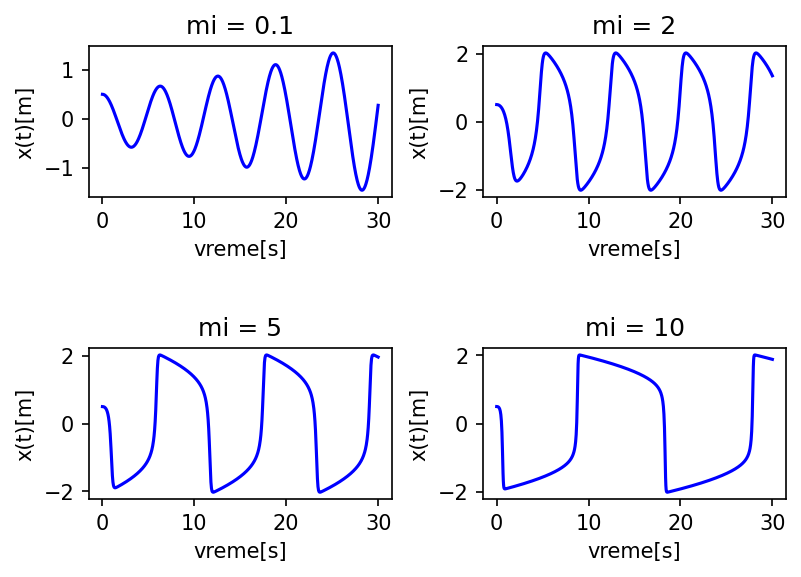

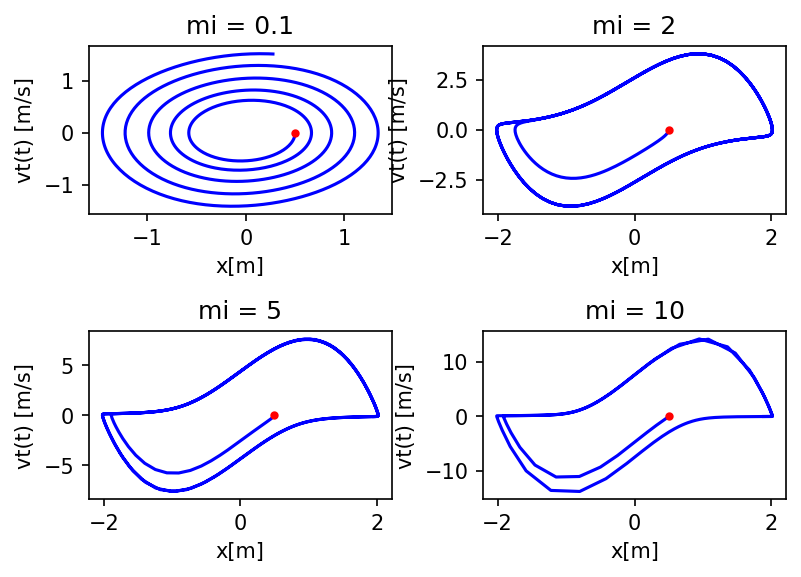

In [37]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

def vanderpol(y, t, mi):
  y1, y2 = y
  return y2, -mi * (y1**2 - 1) * y2 - y1

mi = [0.1, 2, 5, 10]
t = np.linspace(0, 30, 1000)
PUslov = [0.5, 0]

plt.figure(1, dpi = 150)
for index, value in enumerate(mi):
  sol = integrate.odeint(vanderpol, PUslov, t, args = (value, ))
  ax = plt.subplot(2, 2, index + 1)
  ax.set_title(f"mi = {value}")
  plt.xlabel('vreme[s]')
  plt.ylabel('x(t)[m]')
  plt.subplots_adjust(hspace = 1, wspace = .3)
  plt.plot(t, sol[:,0], color = 'blue')

plt.figure(2, dpi = 150)
for index, value in enumerate(mi):
  sol = integrate.odeint(vanderpol, PUslov, t, args = (value, ))
  ax = plt.subplot(2, 2, index + 1)
  ax.set_title(f"mi = {value}")
  plt.ylabel('vt(t) [m/s]')
  plt.xlabel('x[m]')
  plt.subplots_adjust(hspace = .7, wspace = .3)
  plt.plot(sol[:,0], sol[:,1], color = 'blue')
  plt.plot(0.5, 0, color='red', marker='.')



Komentarisati kako parametar $\mu$ utiče na dobijenu dinamiku. Kakve su oscilacije u slučaju malog "prigušenja", a kakve u slučaju velikog? Komentarisati oblike faznih dijagrama u zavisnosti od parametra $\mu$. U skladu sa datim početnim uslovima, za svaki od slučaja prepoznati početnu tačku faznog dijagrama i obeležiti je na grafiku markerom crvene boje. Komentarisati u kom smeru se iscrtava fazni dijagram. 

Za malo mi u prvom slucaju, sistem se ponasa kao oscilator sa prinudnom silom, tj. ima neki dotok energije s obzirom na njegovo sirenje. Ostali formiraju zatvorene oblike, sto sugerise da oni odrzavaju energiju, s tim sto se period oscilacija povecava sa povecanjem broja mi. Fazni dijagram se iscrtava u smeru kazaljke na satu, od unutra ka spolja.

b) Napisati Python definiciju <font color='blue'>maksimumi</font> koja pronalazi sve lokalne maksimume zavisnosti $x(t)$, odnosno vraća vrednosti maksimuma i vremenske trenutke u kojima se maksimumi dostižu. Primeniti funkciju na sva četiri rešenja iz prethodne tačke. Korišćenjem naredbe <font color='blue'>numpy.diff</font> kao i naredbe za srednju vrednost niza brojeva, za svaku vrednost parametra $\mu$ odrediti i ispisati period oscilacija kao srednju vrednost rastojanja između susedih maksimuma.  

In [2]:
def maksimumi(niz):
  lok_max = []
  vreme = []
  for i in range(1, len(niz) - 1):
    if niz[i - 1] < niz[i] and niz[i] > niz[i + 1]:
      lok_max.append(niz[i])
      vreme.append(i*0.03)
  return lok_max, vreme

for index, value in enumerate(mi):
  sol = integrate.odeint(vanderpol, PUslov, t, args = (value, ))
  lok_max, vreme = maksimumi(sol[:,0])
  pom = np.diff(vreme)
  T = sum(pom) / len(pom)
  print(f"Period za mi = {value}, T = {T:.2f}s")





Period za mi = 0.1, T = 6.27s
Period za mi = 2, T = 7.63s
Period za mi = 5, T = 11.59s
Period za mi = 10, T = 19.08s


Sa rastom parametra mi, period raste.

c) Varirati parametar $\mu$ od $0.1$ do $15$ u $20$ tačaka i u svakoj tački izračunati period oscilacija. Nacrtati grafik zavisnosti perioda oscilacija $T$ od parametra $\mu$. Obeležiti ose grafika. Koristeći <font color='blue'>scipy.optimize.curve_fit</font> odrediti koeficijente koji definišu optimalnu pravu.  

Koficijent prave: 1.4364860656715333


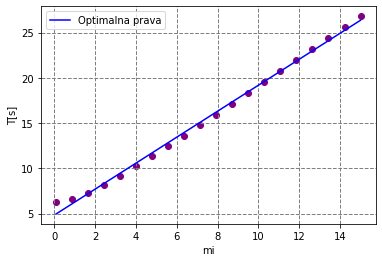

In [38]:
from scipy.optimize import curve_fit

mi = np.linspace(0.1, 15, 20)
t = np.linspace(0, 100, 3333)
T = []
for index, value in enumerate(mi):
  sol = integrate.odeint(vanderpol, PUslov, t, args = (value, ))
  lok_max, vreme = maksimumi(sol[:,0])
  pom = np.diff(vreme)
  T.append(sum(pom) / len(pom))

plt.scatter(mi, T, color='purple')
plt.xlabel("mi")
plt.ylabel("T[s]")
plt.grid(b = True, axis = 'both', color = 'grey', linewidth = 1, linestyle = '--' )

def func(mi, a, b):
  return a*mi + b 

popt, pcov = curve_fit(func, mi, T)
print(f"Koficijent prave: {popt[0]}")
plt.figure(1, dpi = 150)
plt.plot(mi, func(mi, popt[0], popt[1]), color = "blue", label = 'Optimalna prava')
plt.legend()
plt.show()




d) Umesto ugrađenih metoda, jednačinu rešiti primenom metode konačnih razlika. Ponoviti grafike iz tačke a) primenom ove metode. Na jednom $2\times 2$ subplot grafiku nacrtati rešenja $x(t)$ iz tačke a) kao i rešenja za $x(t)$ dobijena primenom FDM metode. Obeležiti ose svake ćelije grafika, uneti naslov svake ćelije, kao i legendu. Na drugom $2\times 2$ subplot grafiku nacrtati fazne dijagrame $dx/dt$ u funkciji $x$ iz tačke a) kao i fazne dijagrame dobijene primenom FDM metode. Obeležiti ose svake ćelije grafika, uneti naslov svake ćelije, kao i legendu. 

Pažljivo odabrati vremenski korak rešavanja. Da li izbor vremenskog koraka zavisi od parametra $\mu$ i ako zavisi komentarisati zašto. 

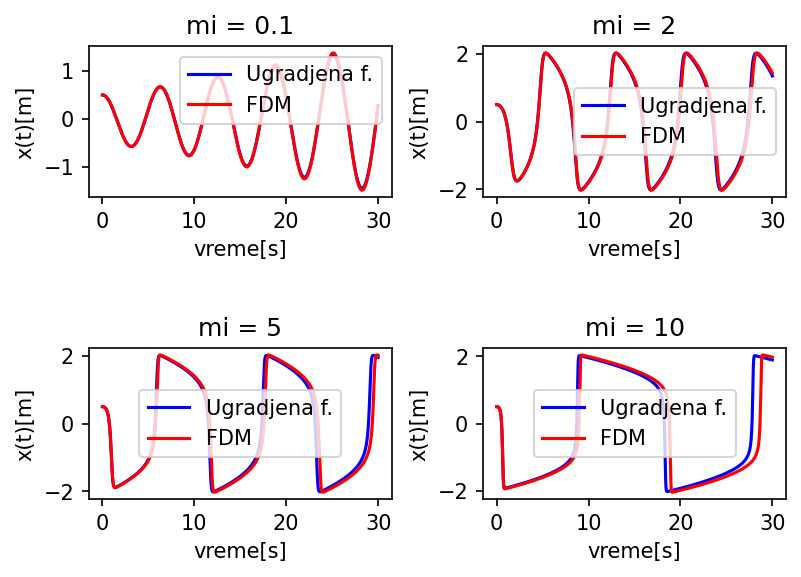

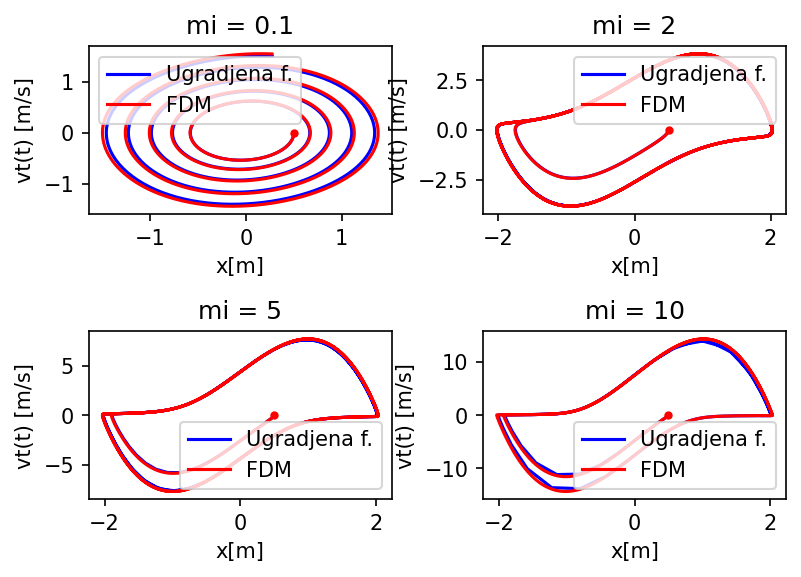

In [36]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

def vanderpol(y, t, mi):
  y1, y2 = y
  return y2, -mi * (y1**2 - 1) * y2 - y1

mi = [0.1, 2, 5, 10]
t = np.linspace(0, 30, 1000)
PUslov = [0.5, 0]

deltat = 0.003
nizt = np.arange(0, 30, deltat)
dimt = np.size(nizt)

plt.figure(1, dpi = 150)
for index, value in enumerate(mi):
  sol = integrate.odeint(vanderpol, PUslov, t, args = (value, ))

  u1 = np.zeros(dimt)
  u2 = np.zeros(dimt)
  u1[0] = 0.5
  u2[0] = 0
  for i in range(0, dimt - 1):
    u1[i + 1] = u1[i] + deltat * u2[i]
    u2[i + 1] = u2[i] + deltat * (-value * (u1[i]**2 - 1) * u2[i] - u1[i])

  ax = plt.subplot(2, 2, index + 1)
  ax.set_title(f"mi = {value}")
  plt.xlabel('vreme[s]')
  plt.ylabel('x(t)[m]')
  plt.subplots_adjust(hspace = 1, wspace = .3)
  plt.plot(t, sol[:,0], color = 'blue', label = 'Ugradjena f.')
  plt.plot(nizt, u1, color = 'red', label = 'FDM' )
  plt.legend()

plt.figure(2, dpi = 150)
for index, value in enumerate(mi):
  sol = integrate.odeint(vanderpol, PUslov, t, args = (value, ))

  u1 = np.zeros(dimt)
  u2 = np.zeros(dimt)
  u1[0] = 0.5
  u2[0] = 0
  for i in range(0, dimt - 1):
    u1[i + 1] = u1[i] + deltat * u2[i]
    u2[i + 1] = u2[i] + deltat * (-value * (u1[i]**2 - 1) * u2[i] - u1[i])

  ax = plt.subplot(2, 2, index + 1)
  ax.set_title(f"mi = {value}")
  plt.ylabel('vt(t) [m/s]')
  plt.xlabel('x[m]')
  plt.subplots_adjust(hspace = .7, wspace = .3)
  plt.plot(sol[:,0], sol[:,1], color = 'blue', label = 'Ugradjena f.')
  plt.plot(u1, u2, color = 'red', label = 'FDM')
  plt.plot(0.5, 0, color='red', marker='.')
  plt.legend()


Na graficima se moze primetiti da se metod skoro potpuno poklapa sa resenjem pod a), ali da se sa rastom parametra mi 'trazi' manja vrednost za dt (u gornjem primeru, smanjio sam korak za FDM metod posto je razlika bila izuzetno vidljiva). Ako pogledamo izraz za dobijanje sledece vrednosti brzine, uvidjamo da 'mi' mnozi dt, tako da prakticno povecavanjem 'mi' povecavamo i korak po kom diferenciramo, zbog cega dobijamo sve vecu gresku u svakom sledecem rezultatu. 